# Download data

Data available via scikit-learn

> https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

In [14]:
from sklearn import datasets

##### classifiction (supervised/descrete) #####
wine_bunch = datasets.load_wine()
print(type(wine_bunch))
print(wine_bunch.keys())
# print(wine_bunch.DESCR)

##### regression (supervised/continuous) #####
reg_bunch = datasets.load_boston()
print(reg_bunch.keys())


##### clustering (unsupervised/descrete) ####
#radmon generated data
# gene expression
##### dimensionality reduction (unuspervised/continuous) #####
#https://idyll.pub/post/dimensionality-reduction-293e465c2a3443e8941b016d/
#gene expression

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.3

# Pandas overview

In [16]:
import pandas as pd
import numpy as np
wine = pd.DataFrame(wine_bunch.data, columns=wine_bunch.feature_names)
display(wine)

# # play with these functions #
# print(list(wine))
# print(wine.proline)
# print(wine.iloc[10:20,])
# # print(wine.iloc[10:20,['ash','magnesium']])  # error bec iloc but col name instead of index
# print(wine.iloc[10:20,0:3])
# print(wine.loc[10:20,['ash','magnesium']])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0


['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
0      1065.0
1      1050.0
2      1185.0
3      1480.0
4       735.0
5      1450.0
6      1290.0
7      1295.0
8      1045.0
9      1045.0
10     1510.0
11     1280.0
12     1320.0
13     1150.0
14     1547.0
15     1310.0
16     1280.0
17     1130.0
18     1680.0
19      845.0
20      780.0
21      770.0
22     1035.0
23     1015.0
24      845.0
25      830.0
26     1195.0
27     1285.0
28      915.0
29     1035.0
        ...  
148     650.0
149     550.0
150     500.0
151     480.0
152     425.0
153     675.0
154     640.0
155     725.0
156     480.0
157     880.0
158     660.0
159     620.0
160     520.0
161     680.0
162     570.0
163     675.0
164     615.0
165     520.0
166     695.0
167     685.0
168     750.0
169     630.0
170     510.0
171     470.0
172     660.0
173   

wineX is Pandas DataFrame (bacuase we made it a DF earlier)

wineY is ndaray

In [19]:
wineX = wine
wineY = wine_bunch.target

print(wineX.shape,wineY.shape)
print(type(wineX))
print(type(wineY))

(178, 13) (178,)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


# Supervised classification

## Test / train split

In [32]:
# random sampling
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wineX, wineY, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

(142, 13) (142,)
(36, 13) (36,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Repeat the split, but in the context of K-fold validation

In [33]:
# k-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=42, shuffle=True)
kf.get_n_splits(wineX)
print(kf)  
for train_index, test_index in kf.split(wineX):
    X_train, X_test = wineX.iloc[train_index], wineX.iloc[test_index]
    y_train, y_test = wineY[train_index], wineY[test_index]
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
# NOTE: wineX is a dataframe, wineY is a ndarray (syntax is different line 7 and 8)
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

KFold(n_splits=5, random_state=42, shuffle=True)
(142, 13) (142,)
(36, 13) (36,)
(142, 13) (142,)
(36, 13) (36,)
(142, 13) (142,)
(36, 13) (36,)
(143, 13) (143,)
(35, 13) (35,)
(143, 13) (143,)
(35, 13) (35,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## KNN classification

Visualize the data

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


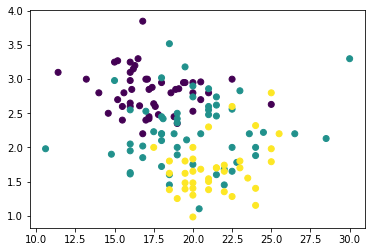

In [34]:
%matplotlib inline
# K Nearest Neighbors
import matplotlib.pyplot as plt
print(list(X_train))
plt.scatter(X_train['alcalinity_of_ash'], X_train['total_phenols'],c=y_train)
plt.show()
# CHANGE which features that you are plotting
# Can only visualize on 2 dimensions but algorithm will cluster on all dimensions

In [30]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3, leaf_size=10)
neigh.fit(X_train, y_train) 
print(neigh)
# print(neigh.predict(X_test))
# print(neigh.predict_proba(X_test))
# # TEST SCORE
# print(neigh.score(X_test,y_test))
# # TRAINING SCORE
# print(neigh.score(X_train,y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
[0 0 0 2 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 0 0 2 2 0 2]
[[1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.66666667 0.33333333 0.        ]
 [0.         0.33333333 0.66666667]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.66666667 0.33333333]
 [0.66666667 0.33333333 0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.66666667 0.33333333]
 [0.         1.         0.        ]
 [0.         0.66666667 0.33333333]
 [0.         1.         0.        ]
 [0.         0.66666667 0.33333333]
 [0.         1.      

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


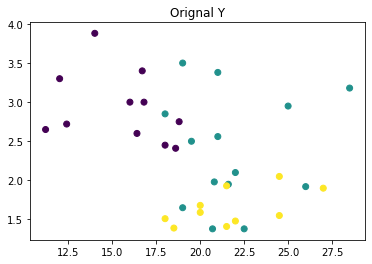

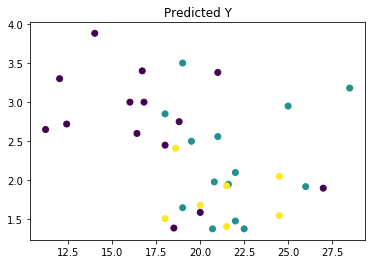

In [35]:
print(list(X_train))
y_pred = neigh.predict(X_test)

#PLOT RESULTS
plt.title("Orignal Y")
plt.scatter(X_test['alcalinity_of_ash'], X_test['total_phenols'],c=y_test)
plt.show()
plt.title("Predicted Y")
plt.scatter(X_test['alcalinity_of_ash'], X_test['total_phenols'],c=y_pred)
plt.show()

Visualizing the results

TRY ON DIFFERENT SPLIT!!

Confusion matrix, without normalization
[[10  0  1]
 [ 1 13  0]
 [ 3  1  6]]
Normalized confusion matrix
[[0.90909091 0.         0.09090909]
 [0.07142857 0.92857143 0.        ]
 [0.3        0.1        0.6       ]]


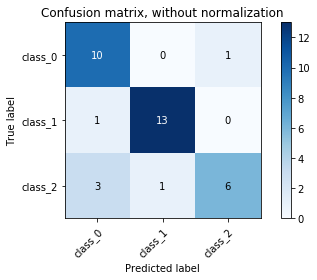

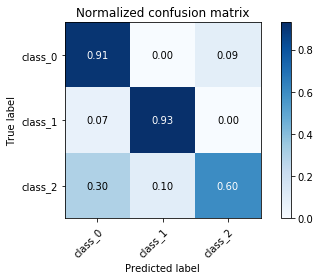

In [39]:
# run cell below plotting function heading first before running this cell (out of order)

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = wine_bunch.target_names

plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

### Plotting function
Refernce:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [38]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Excercise 1 (30minutes)

In [61]:
# 1. Perform K-fold KNN cross validation on the wine data
# 2. Modify KNN hyper parameters and see how it effects the results

# #pseudo code:
# create k-folds
# for each split:
#     train KNN
#     predict for the split
#     see the score

# k-fold
from sklearn.model_selection import KFold
kf = KFold(n_splits=6,random_state=42, shuffle=True)
kf.get_n_splits(wineX)
print(kf)  

for train_index, test_index in kf.split(wineX):
    X_train, X_test = wineX.iloc[train_index], wineX.iloc[test_index]
    y_train, y_test = wineY[train_index], wineY[test_index]
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    neigh = KNeighborsClassifier(n_neighbors=3, leaf_size=10)
    neigh.fit(X_train, y_train) 
#     print(neigh)
#     print(neigh.predict(X_test))
#     print(neigh.predict_proba(X_test))
    # TEST SCORE
    print("TEST score {:f}".format(neigh.score(X_test,y_test)))
    # TRAINING SCORE
    print("TRAINING score {:f}".format(neigh.score(X_train,y_train)))



KFold(n_splits=6, random_state=42, shuffle=True)
(148, 13) (148,)
(30, 13) (30,)
TEST score 0.766667
TRAINING score 0.864865
(148, 13) (148,)
(30, 13) (30,)
TEST score 0.766667
TRAINING score 0.858108
(148, 13) (148,)
(30, 13) (30,)
TEST score 0.600000
TRAINING score 0.864865
(148, 13) (148,)
(30, 13) (30,)
TEST score 0.700000
TRAINING score 0.864865
(149, 13) (149,)
(29, 13) (29,)
TEST score 0.551724
TRAINING score 0.872483
(149, 13) (149,)
(29, 13) (29,)
TEST score 0.827586
TRAINING score 0.879195


# Supervised regression

## Test / train split

In [72]:
##### regression (supervised/continuous) #####
reg_bunch = datasets.load_boston()
print(reg_bunch.keys())
print(reg_bunch.data)

# random sampling
from sklearn import preprocessing
reg_bunch.data = preprocessing.scale(reg_bunch.data)
print(reg_bunch.DESCR)
regX = pd.DataFrame(reg_bunch.data, columns=reg_bunch.feature_names)
regY = reg_bunch.target
print("regX sample: \n", regX.iloc[0:10])
print("regY sample: \n", regY[0:10])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(regX, regY, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres 

## Regression

https://scikit-learn.org/stable/modules/linear_model.html

[-0.97149423  0.70155562  0.27675212  0.70653152 -1.99143043  3.11571836
 -0.17706021 -3.04577065  2.28278471 -1.79260468 -1.97995351  1.12649864
 -3.62814937]
LR Train score: 0.750886
LR Test score: 0.668759


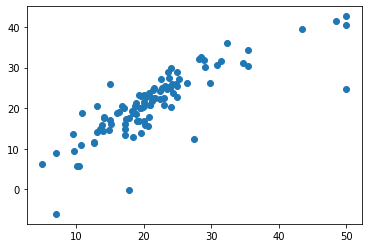

In [92]:
##### linear regression ########
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
y_pred = reg.predict(X_test)
print("LR Train score: {:f}".format(reg.score(X_train,y_train)))
print("LR Test score: {:f}".format(reg.score(X_test,y_test)))
plt.scatter(y_test, y_pred)
plt.show()

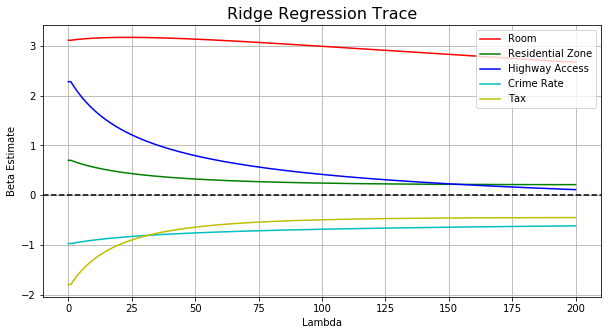

[-0.84416652  0.46198062 -0.03418626  0.75114482 -1.53723325  3.17316115
 -0.1880602  -2.48151078  1.31849282 -0.97365431 -1.83807721  1.08177436
 -3.40377171]
RIDGE Train score: 0.747905
RIDGE Test score: 0.663563


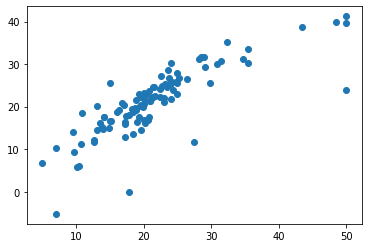

In [93]:
#### RIDGE regression  ######
from sklearn.linear_model import Ridge

def find_alpha():
    # adopted from: https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db
    ridge_reg = Ridge(alpha=0)
    ridge_reg.fit(X_train, y_train)
    ridge_df = pd.DataFrame({'variable': reg_bunch.feature_names, 'estimate': ridge_reg.coef_})
    ridge_train_pred = []
    ridge_test_pred = []
    # iterate lambdas

    # iterate lambdas
    for alpha in np.arange(0, 200, 1):
        # training
        ridge_reg = Ridge(alpha=alpha)
        ridge_reg.fit(X_train, y_train)
        var_name = 'estimate' + str(alpha)
        ridge_df[var_name] = ridge_reg.coef_
        # prediction
        ridge_train_pred.append(ridge_reg.predict(X_train))
        ridge_test_pred.append(ridge_reg.predict(X_test))

    # organize dataframe
    ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()
    # plot betas by lambda
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
    ax.axhline(y=0, color='black', linestyle='--')
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Beta Estimate")
    ax.set_title("Ridge Regression Trace", fontsize=16)
    ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
    ax.grid(True)
    plt.show()

# Rooms is the features that has the most significance
find_alpha()

ridge = Ridge(alpha=20.0)
ridge.fit(X_train, y_train)
print(ridge.coef_)
y_pred = ridge.predict(X_test)
print("RIDGE Train score: {:f}".format(ridge.score(X_train,y_train)))
print("RIDGE Test score: {:f}".format(ridge.score(X_test,y_test)))
plt.scatter(y_test, y_pred)
plt.show()

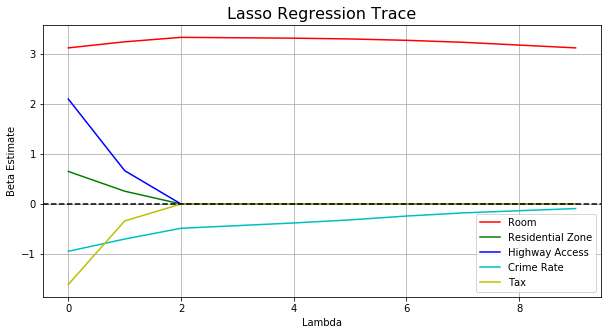

[-0.83796934  0.46704064  0.          0.70483741 -1.74067035  3.16378634
 -0.06698043 -2.67152839  1.42785917 -0.98008334 -1.90529396  1.07252204
 -3.62223499]
LASSO Train score: 0.749226
LASSO Test score: 0.662584


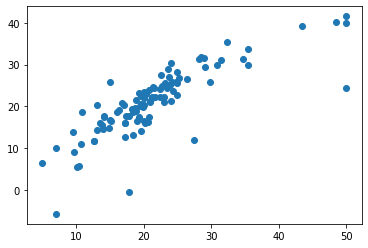

In [94]:
#### LASSO regression  ######
from sklearn import linear_model

def find_alpha():
    ridge_reg = linear_model.Lasso(alpha=0.01)
    ridge_reg.fit(X_train, y_train)
    ridge_df = pd.DataFrame({'variable': reg_bunch.feature_names, 'estimate': ridge_reg.coef_})
    ridge_train_pred = []
    ridge_test_pred = []
    # iterate lambdas

    # iterate lambdas
    for alpha in np.arange(0.1, 1,0.1):
        # training
        ridge_reg = linear_model.Lasso(alpha=alpha)
        ridge_reg.fit(X_train, y_train)
        var_name = 'estimate' + str(alpha)
        ridge_df[var_name] = ridge_reg.coef_
        # prediction
        ridge_train_pred.append(ridge_reg.predict(X_train))
        ridge_test_pred.append(ridge_reg.predict(X_test))

    # organize dataframe
    ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()
    # plot betas by lambda
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
    ax.axhline(y=0, color='black', linestyle='--')
    ax.set_xlabel("Lambda")
    ax.set_ylabel("Beta Estimate")
    ax.set_title("Lasso Regression Trace", fontsize=16)
    ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
    ax.grid(True)
    plt.show()

find_alpha()

lasso = linear_model.Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
print(lasso.coef_)
y_pred = lasso.predict(X_test)
print("LASSO Train score: {:f}".format(lasso.score(X_train,y_train)))
print("LASSO Test score: {:f}".format(lasso.score(X_test,y_test)))

plt.scatter(y_test, y_pred)
plt.show()

LR train:  0.9767790895554215
LR test:  0.3770297714569159
LR RMSE:  3.1986012122242817

Ridge train:  0.9545350496479551
Ridge test:  0.6537684262994671
Ridge RMSE:  2.0192459660320226

Lasso train:  0.917867089365298
Lasso test:  0.5547537632599874
Lasso RMSE:  2.592433720110876

 Hist Plots 
 LR test: 



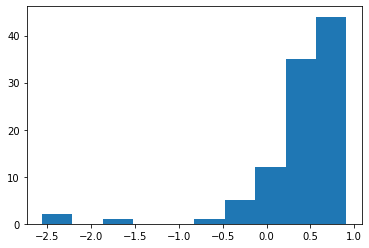

Ridge test: 



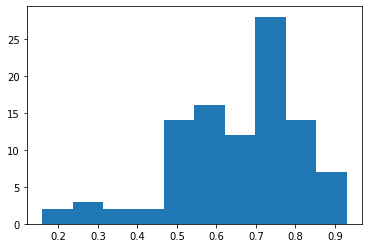

Lasso test: 



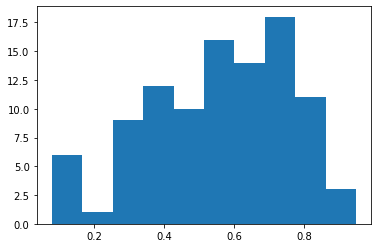

In [97]:
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

np.random.seed(101)

#generate dataset (wide datset)
X = np.random.normal(0,1,size=(50, 30))
# will have 10 some high coefficients 
coef1 = np.random.uniform(0.5,1,10)
# and 20 low coefficeints
coef2 = np.random.uniform(0.0,0.3,20)
coef = np.concatenate((coef1, coef2), axis=0)
# plt.hist(coef)
# plt.show()
y_dot = X.dot(coef)

# generate response data by adding noise 
# why adding noise?
y_response = y_dot + np.random.normal(0,1,50)


lr_train = []
lr_test = []
lr_rmse = []
ridge_train = []
ridge_test = []
ridge_rmse = []
lasso_train = []
lasso_test = []
lasso_rmse = []


for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y_response, test_size=0.2)

    ##### linear regression ########
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    lr_train.append(reg.score(X_train,y_train))
    lr_test.append(reg.score(X_test,y_test))
    lr_rmse.append(mean_squared_error(y_test, y_pred))


    #### RIDGE regression  ######
    ridge = Ridge(alpha=5.0)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    ridge_train.append(ridge.score(X_train,y_train))
    ridge_test.append(ridge.score(X_test,y_test))
    ridge_rmse.append(mean_squared_error(y_test, y_pred))

    
    #### LASSO regression  ######
    lasso = linear_model.Lasso(alpha=0.1)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    lasso_train.append(lasso.score(X_train,y_train))
    lasso_test.append(lasso.score(X_test,y_test))
    lasso_rmse.append(mean_squared_error(y_test, y_pred))

    
    
print('LR train: ',sum(lr_train)/len(lr_train))
print('LR test: ',sum(lr_test)/len(lr_test))
print('LR RMSE: ',sum(lr_rmse)/len(lr_rmse))
print("")
print('Ridge train: ',sum(ridge_train)/len(ridge_train))
print('Ridge test: ',sum(ridge_test)/len(ridge_test))
print('Ridge RMSE: ',sum(ridge_rmse)/len(ridge_rmse))
print("")
print('Lasso train: ',sum(lasso_train)/len(lasso_train))
print('Lasso test: ',sum(lasso_test)/len(lasso_test))
print('Lasso RMSE: ',sum(lasso_rmse)/len(lasso_rmse))



#examine variance and bias
print('\n Hist Plots \n LR test: \n')
plt.hist(lr_test)
plt.show()
print('Ridge test: \n')
plt.hist(ridge_test)
plt.show()
print('Lasso test: \n')
plt.hist(lasso_test)
plt.show()


# ORANGE

Use the script below

https://www.youtube.com/playlist?list=PLmNPvQr9Tf-ZSDLwOzxpvY-HrE0yv-8Fy&disable_polymer=true

In [ ]:
import numpy as np
from Orange.data import Domain, Table

#generate dataset (wide datset)
X = np.random.normal(0,1,size=(50, 30))
# will have 10 some high coefficients 
coef1 = np.random.uniform(0.5,1,10)
# and 20 low coefficeints
coef2 = np.random.uniform(0.0,0.3,20)
coef = np.concatenate((coef1, coef2), axis=0)
# plt.hist(coef)
# plt.show()
y_dot = X.dot(coef)
y_response = y_dot + np.random.normal(0,1,50)

y_response = y_response.reshape((y_response.shape[0],1))
all_data = np.append(X, y_response, 1)
out_data = Table(all_data)

## Excersices

1. Add seed to both Jupyter code and to ORANGE code: np.random.seed(101)

2. Why are the results not the same?

3. Try generating larger data set (50, 30) -> (500, 30). What happens?

## Regression Lab
![alt text](orangeReg.png "Workflow")

<b>Data</b>: /data/dow_jones_index/dow_jones_index2.csv

<b>Goal</b>: predict closing price for the last 3 days for each stock. Date is represented as numeric value here, so you need to predict for date > 40700

## Classification Lab
![alt text](orangeClass.png "Workflow")

<b>Data</b>: /data/titanic.csv

<b>Goal</b>: Randomly split into train and test and predict "survived" variable